In [17]:

import matplotlib.pyplot as plt 
from src.main.Card import Card
from src.main.Player import Player
from src.main.Dealer import Dealer
from src.main.Wallet import Wallet
from src.utils.PlayUtils import *
from src.utils.StrategyUtils import dealer_strategy, player_strategy_hardTotal, player_strategy_hardSoftTotal
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
days= 365

In [19]:
bs_moneyLoss_total = []
bs_winner_total = {
    "peasant": [],
    "dealer":[],
}
for day in range(days):
    startingMoney=50000
    bs_results_df, bs_moneyLeft=iterativePlayWithOneWallet(playerStrategy=dealer_strategy, startingMoney=startingMoney, bet=25, numOfDecks=6, plot_enabled=False)
    bs_moneyLoss_total.append(startingMoney - bs_moneyLeft)
    bs_winner_total['peasant'].append(bs_results_df['winner'].value_counts(normalize=True).peasant)
    bs_winner_total['dealer'].append(bs_results_df['winner'].value_counts(normalize=True).dealer)
    # print()

print("Average Lost: ", np.mean(bs_moneyLoss_total))



Average Lost:  11241.986301369863


In [20]:
ht_moneyLoss_total = []
ht_winner_total = {
    "peasant": [],
    "dealer":[],

}
for day in range(days):
    startingMoney=50000
    ht_results_df, ht_moneyLeft=iterativePlayWithOneWallet(playerStrategy=player_strategy_hardTotal, startingMoney=50000, bet=25, numOfDecks=6, plot_enabled=False)
    ht_moneyLoss_total.append(startingMoney - ht_moneyLeft)
    # print(ht_results_df['winner'].value_counts(normalize=True))
    ht_winner_total['peasant'].append(ht_results_df['winner'].value_counts(normalize=True).peasant)
    ht_winner_total['dealer'].append(ht_results_df['winner'].value_counts(normalize=True).dealer)


print("Average Lost: ", np.mean(ht_moneyLoss_total))

Average Lost:  7700.342465753424


In [21]:
hst_moneyLoss_total = []
hst_winner_total = {
    "peasant": [],
    "dealer":[],


} 
for day in range(days):
    startingMoney=50000
    hst_results_df, hst_moneyLeft=iterativePlayWithOneWallet(playerStrategy=player_strategy_hardSoftTotal, startingMoney=50000, bet=25, numOfDecks=6, plot_enabled=False)
    hst_moneyLoss_total.append(startingMoney - hst_moneyLeft)
    # print(ht_results_df['winner'].value_counts(normalize=True))
    hst_winner_total['peasant'].append(hst_results_df['winner'].value_counts(normalize=True).peasant)
    hst_winner_total['dealer'].append(hst_results_df['winner'].value_counts(normalize=True).dealer)


print("Average Lost: ", np.mean(hst_moneyLoss_total))

Average Lost:  5398.356164383562


<Axes: title={'center': 'Money Lost for diff strategy'}, xlabel='days', ylabel='money lost'>

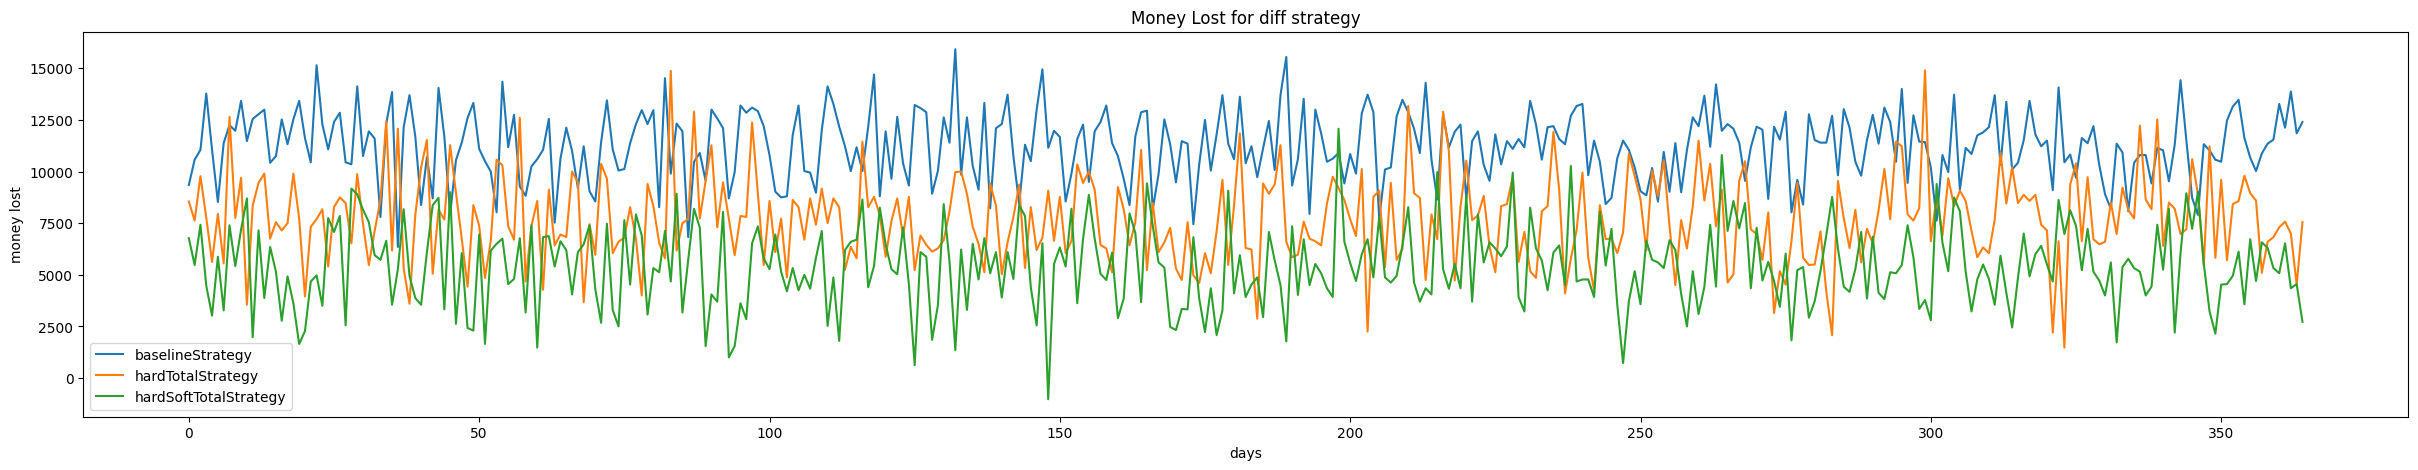

In [22]:
acc_results= {
    "baselineStrategy": bs_moneyLoss_total,
    "hardTotalStrategy": ht_moneyLoss_total,
    "hardSoftTotalStrategy": hst_moneyLoss_total
}
pd.DataFrame(acc_results).plot(kind="line", title="Money Lost for diff strategy", xlabel="days", ylabel="money lost", figsize=(30, 5))

Text(0.5, 1.0, 'Distribution of Money loss')

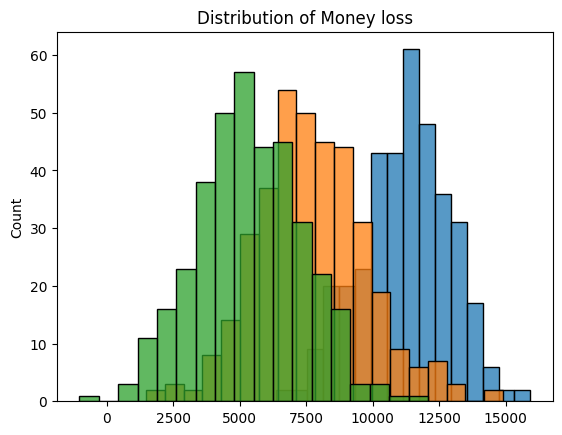

In [23]:
i = 0
for key in acc_results:
    sns.histplot(acc_results[key])
    i += 1
plt.title("Distribution of Money loss")

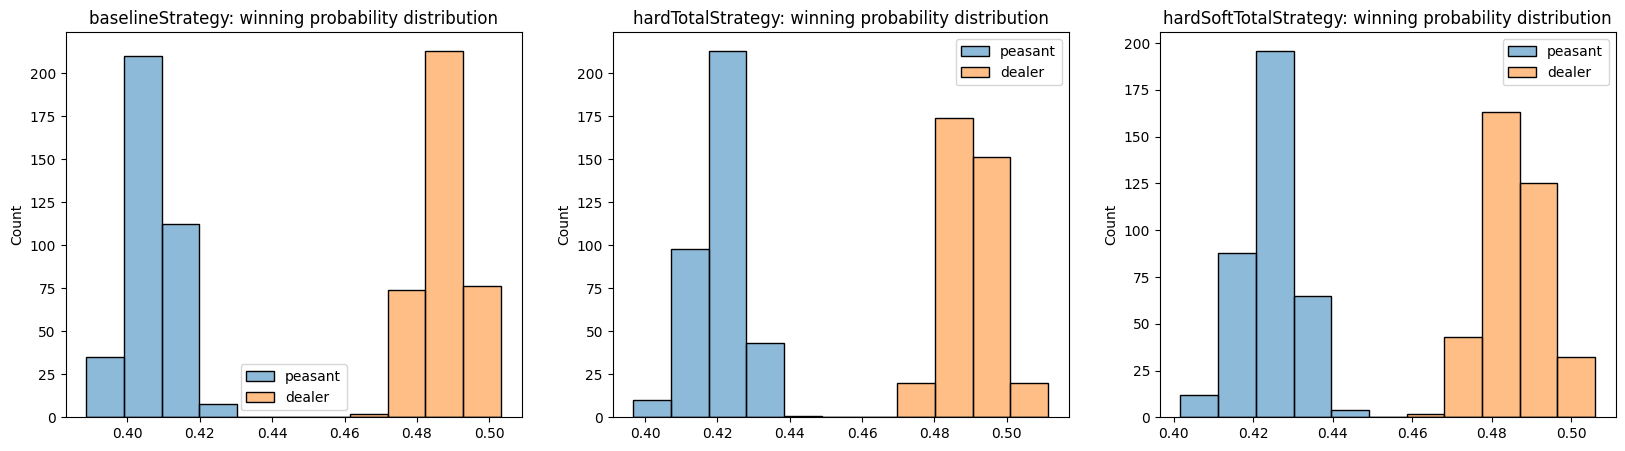

In [24]:
acc_stats= {
    "baselineStrategy": bs_winner_total,
    "hardTotalStrategy": ht_winner_total,
    "hardSoftTotalStrategy": hst_winner_total
}
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
i = 0
for key in acc_stats:
    sns.histplot(acc_stats[key], ax =ax[i])
    ax[i].set_title(key + ": winning probability distribution")
    i += 1
